In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [73]:
data = pd.read_csv("C://Users//Adarsh//Downloads//BankNote_Authentication.csv")
data = data.rename({'variance' : 'Image.Var'}, axis=1)
data = data.rename({'skewness' : 'Image.Skew'}, axis=1)
data = data.rename({'curtosis' : 'Image.Curt'}, axis=1)
data = data.rename({'entropy' : 'Entropy'}, axis=1)
data = data.rename({'class' : 'Class'}, axis=1)

data.head(6)

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0
5,4.36840,9.6718,-3.9606,-3.16250,0


In [74]:
data['Class'].unique()

array([0, 1], dtype=int64)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [76]:
# seperating feature and column
features = ['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy']
targets = ['Class']

In [77]:
#################################################################################
#                       Scaling data

In [78]:
data_norm = data.copy()
sc = StandardScaler()
data_norm[features] = sc.fit(data[features]).transform(data[features])  # features are  not in '' as they are not name of
                            # the column

In [79]:
################################################################################
#                     TSNE 

In [80]:
tsne = TSNE(learning_rate=500, n_components = 2)

x_tsne = tsne.fit_transform(data_norm[features])

In [81]:
y_tsne = data[targets]
y_tsne

,Class
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


In [82]:
pd.DataFrame(x_tsne)


,0,1
0,-28.819801,-25.779907
1,-26.822790,-29.378880
2,37.071777,-29.899214
3,-60.819981,-10.401931
4,26.104042,-22.881344
...,...,...
1367,-2.071290,20.107506
1368,34.184704,18.727997
1369,60.413616,16.214188
1370,52.001461,14.781543


In [83]:
################################################################################
#                     VISUALISATION 

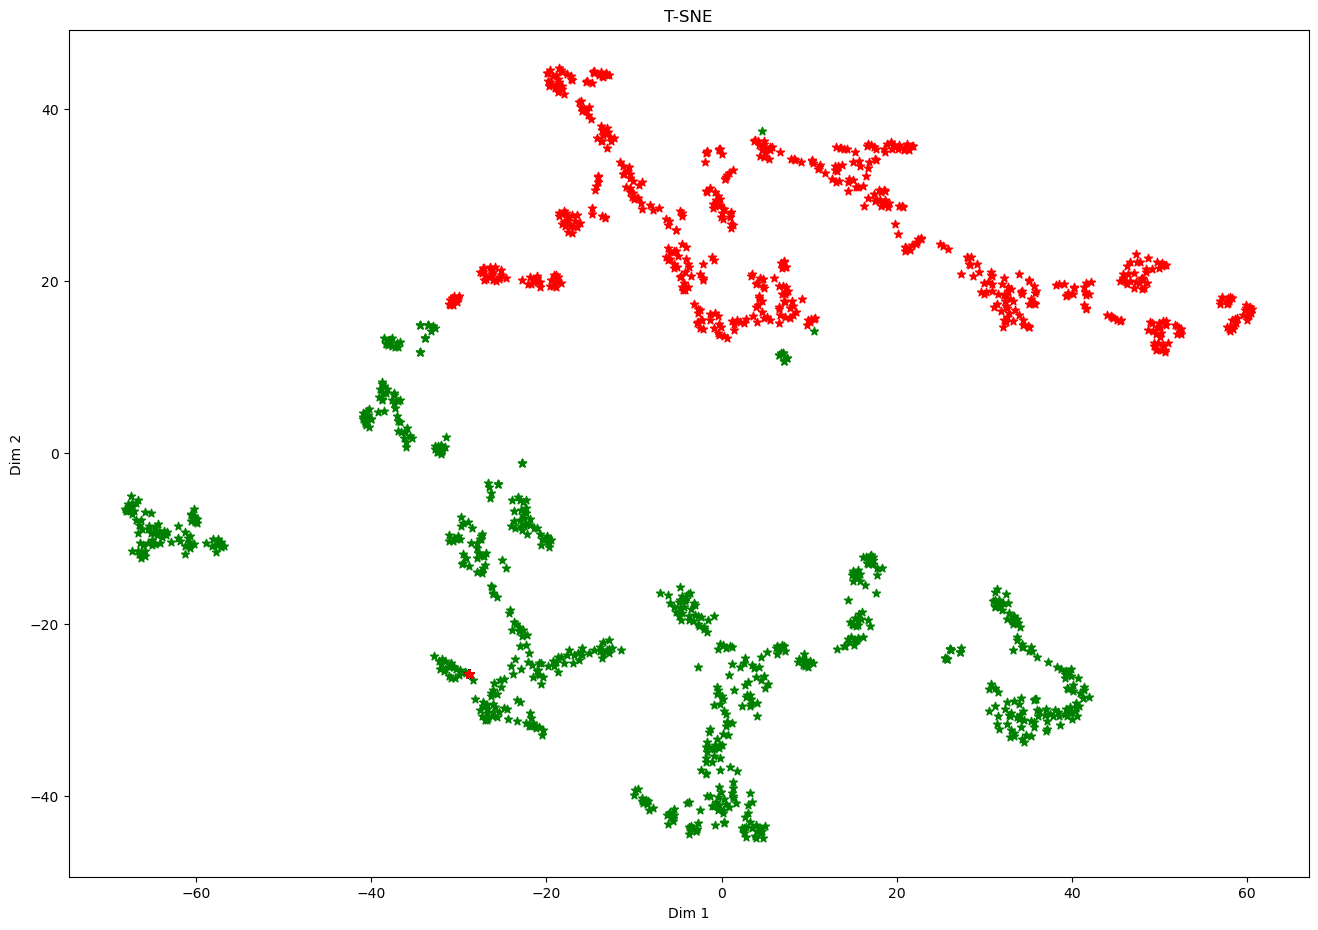

In [84]:
plt.figure(figsize=(16, 11))
plt.scatter(x_tsne[np.where(y_tsne == 0), 0], x_tsne[np.where(y_tsne == 0), 1], color='g', marker='*')  # it should not be y 
               # but y_tnse as it has only two values either 0 or 1. y is not defined
plt.scatter(x_tsne[np.where(y_tsne == 1), 0], x_tsne[np.where(y_tsne == 1), 1], color='r', marker='*')
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.title("T-SNE")
plt.show()